In [1]:
# Week 7 Assignment: Data Analysis with Pandas and Matplotlib

## Task 1: Load and Explore the Dataset
### Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset using pandas
try:
    df = pd.read_csv('Expanded_data_with_more_features.csv')
    print("=== 📁 Dataset loaded successfully. ===")
except FileNotFoundError:
    print("=> ❌ Error: The dataset file was not found.")
    df = pd.DataFrame()  # Create an empty DataFrame
except pd.errors.EmptyDataError:
    print("=> ❌ Error: The dataset file is empty.")
    df = pd.DataFrame()  # Create an empty DataFrame
print(df.head(10))

### Exploring dataset structure
#### Check datatypes
print("\n=== 🧾 Data types of the dataset ===")
print(df.dtypes)

#### Check for missing values
print("\n=== 🧼 Data Cleanup ===")
print("\n=== 🗑️ Before Cleanup ===")
print(f"Entries with missing values: {df.isnull().sum()}")
print(f"Total entries before cleanup: {df.shape[0]}")

#### Cleaning the dataset
##### Fill missing values in 'NrSiblings' with the average number of siblings
avg_siblings = round(df['NrSiblings'].mean(), 0)
df['NrSiblings'].fillna(avg_siblings, inplace=True)

##### Drop rows with any remaining missing values
df.dropna(inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)  # Drop the first column because it's unnamed

print("\n=== 😁 After Cleanup ===")
print(f"Missing Number of Siblings: {df['NrSiblings'].isnull().sum()} have been filled with the average of: {avg_siblings}")
print(f"All other missing values have been dropped.")

print(f"=> Total entries after cleanup: {df.shape[0]}")
print(df.head(10)) # Display the first 10 rows after cleanup

### Save cleaned file as Excel sheet
excel_filename = "Cleaned_student_Records_expanded_version.xlsx"
try:
    df.to_excel(excel_filename, index=False, sheet_name="Cleaned_Data")
except FileNotFoundError:
    print("=> ❌ Error: The dataset file was not found.")
    df = pd.DataFrame()  # Create an empty DataFrame
except pd.errors.EmptyDataError:
    print("=> ❌ Error: The dataset file is empty.")
    df = pd.DataFrame()  # Create an empty DataFrame

print("\n✅ Cleaned data has been saved to {excel_filename}. Feel free to tinker with it!")




=== 📁 Dataset loaded successfully. ===
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female         NaN   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   
5           5  female     group B  associate's degree      standard   
6           6  female     group B        some college      standard   
7           7    male     group B        some college  free/reduced   
8           8    male     group D         high school  free/reduced   
9           9  female     group B         high school  free/reduced   

    TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0       none             married     regularly          yes         3.0   
1        NaN             marr

C:\Users\SMunge\AppData\Local\Temp\ipykernel_21632\2768487480.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NrSiblings'].fillna(avg_siblings, inplace=True)



✅ Cleaned data has been saved to {excel_filename}. Feel free to tinker with it!


In [2]:
## Task 2: Basic Data Analysis
### Calculate basic statistics
print("\n=== 📈 Basic statistics of numerical columns ===")
print(round(df.describe(), 2)) # Rounded to 2 decimal places for better readability

### Grouping of all scores by gender
print(f"\n=== 🧑‍🤝‍🧑 Grouping of Average Math, Reading and Writing scores by gender ===")
avg_all_scores = df.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()
print(f"{avg_all_scores.round(2)}") # Rounded to 2 decimal places for better readability

### Average scores for Reading and Writing for all students
print(f"\n=== ✍️ Average Scores for Reading and Writing for all students ===")
df['AvgReadWriteScore'] = df[['ReadingScore', 'WritingScore']].mean(axis=1) # Create new column of AvgReadWriteScore in dataset for future use
print(f"{round(df['AvgReadWriteScore'].mean(), 2)}") # Rounded to 2 decimal places

### Average Math Score for all students
print(f"\n=== ➕ Average Math Score for all students ===")
print(f"{round(df['MathScore'].mean(), 2)}") # Rounded to 2 decimal places

### Correlation analysis between Average Reading/Writing Scores and Math Scores
print("\n=== 🔗 Correlation matrix ===")
readwrite_to_math_correlation = df['AvgReadWriteScore'].corr(df['MathScore'])
correlation_matrix = df.corr(numeric_only=True) # Added numeric_only=True to avoid FutureWarning
print(f"=> Correlation between Average Reading and Writing Scores and Math Scores: {round(readwrite_to_math_correlation, 2)}") # Rounded to 2 decimals
def corr_explanation(readwrite_to_math_correlation):
    a = 'Average of Reading and Writing Scores'
    b = 'Math Scores'
    if readwrite_to_math_correlation >= 0.7:
        return f"💪 Strong positive correlation: Higher {a} tends to result in higher {b}"
    elif 0.5 <= readwrite_to_math_correlation < 0.7:
        return f"⚖️ Moderate positive correlation: Higher {a} tends to result in higher {b}"
    elif 0.3 <= readwrite_to_math_correlation < 0.5:
        return f"🍃 Weak positive correlation: Higher {a} may result in higher {b}"
    elif -0.3 < readwrite_to_math_correlation < 0.3:
        return f"❓ Very weak or no correlation: Changes in {a} do not seem to affect {b}"
    elif -0.5 <= readwrite_to_math_correlation <= -0.3:
        return f"🍃 Weak negative correlation: Higher {a} may result in lower {b}"
    elif -0.7 <= readwrite_to_math_correlation < -0.5:
        return f"⚖️ Moderate negative correlation: Higher {a} tends to result in lower {b}"
    else: # This now correctly covers strong negative correlation (correlation < -0.7)
        return f"💪 Strong negative correlation: Higher {a} tends to result in lower {b}"
print(f"=> 🧠 Explanation: {corr_explanation(readwrite_to_math_correlation)}. \nThis could be used to predict Math Scores based on the Average of Reading and Writing Scores.")

### Create a summary report
summary_data = {
    'Avg Math Score': [round(df['MathScore'].mean(), 2)],
    'Avg Read/Write Score': [round(df['AvgReadWriteScore'].mean(), 2)],
    'Correlation (Read/Write vs Math)': [round(readwrite_to_math_correlation, 2)],
    'Interpretation': [corr_explanation(readwrite_to_math_correlation)]
}

analysis_df = pd.DataFrame(summary_data)

### Save the data to the new Excel sheet
with pd.ExcelWriter(excel_filename, engine="openpyxl", mode="a") as writer:
    analysis_df.to_excel(writer, sheet_name="Analysis Report", index=False)
    
print("🔍 Includes Analytical Data of Test Scores and Grouping by Gender")


=== 📈 Basic statistics of numerical columns ===
       NrSiblings  MathScore  ReadingScore  WritingScore
count    20266.00   20266.00      20266.00      20266.00
mean         2.14      66.61         69.51         68.57
std          1.41      15.38         14.79         15.49
min          0.00       0.00         10.00          4.00
25%          1.00      56.00         59.00         58.00
50%          2.00      67.00         70.00         69.00
75%          3.00      78.00         80.00         80.00
max          7.00     100.00        100.00        100.00

=== 🧑‍🤝‍🧑 Grouping of Average Math, Reading and Writing scores by gender ===
   Gender  MathScore  ReadingScore  WritingScore
0  female      64.23         73.05         73.05
1    male      69.07         65.86         63.96

=== ✍️ Average Scores for Reading and Writing for all students ===
69.04

=== ➕ Average Math Score for all students ===
66.61

=== 🔗 Correlation matrix ===
=> Correlation between Average Reading and Writing Score


=== 🔍📈 Data Visualization ===

== 📈 Line Chart ==


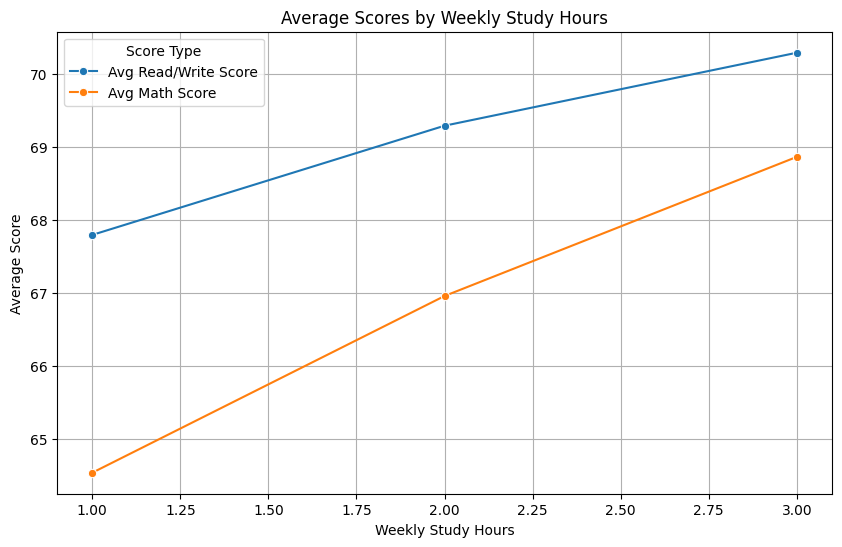


== 📊 Bar Chart ==


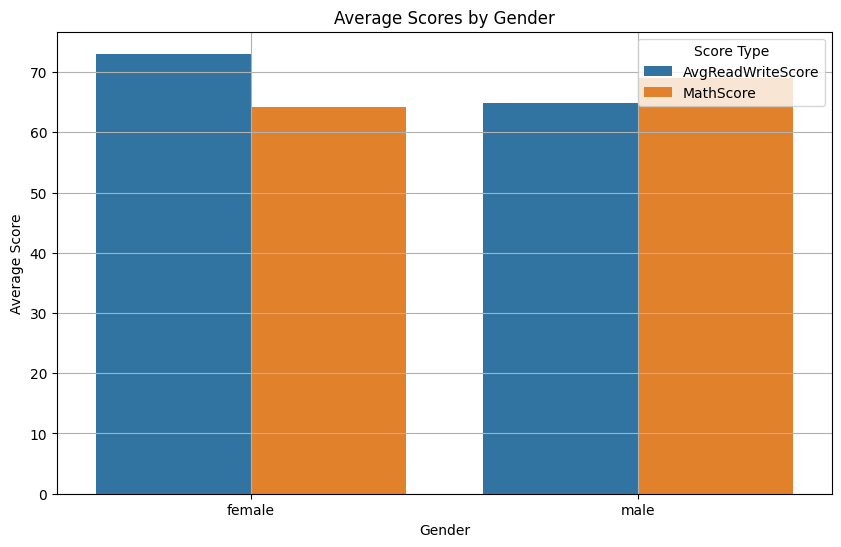


== 📊 Histogram ==


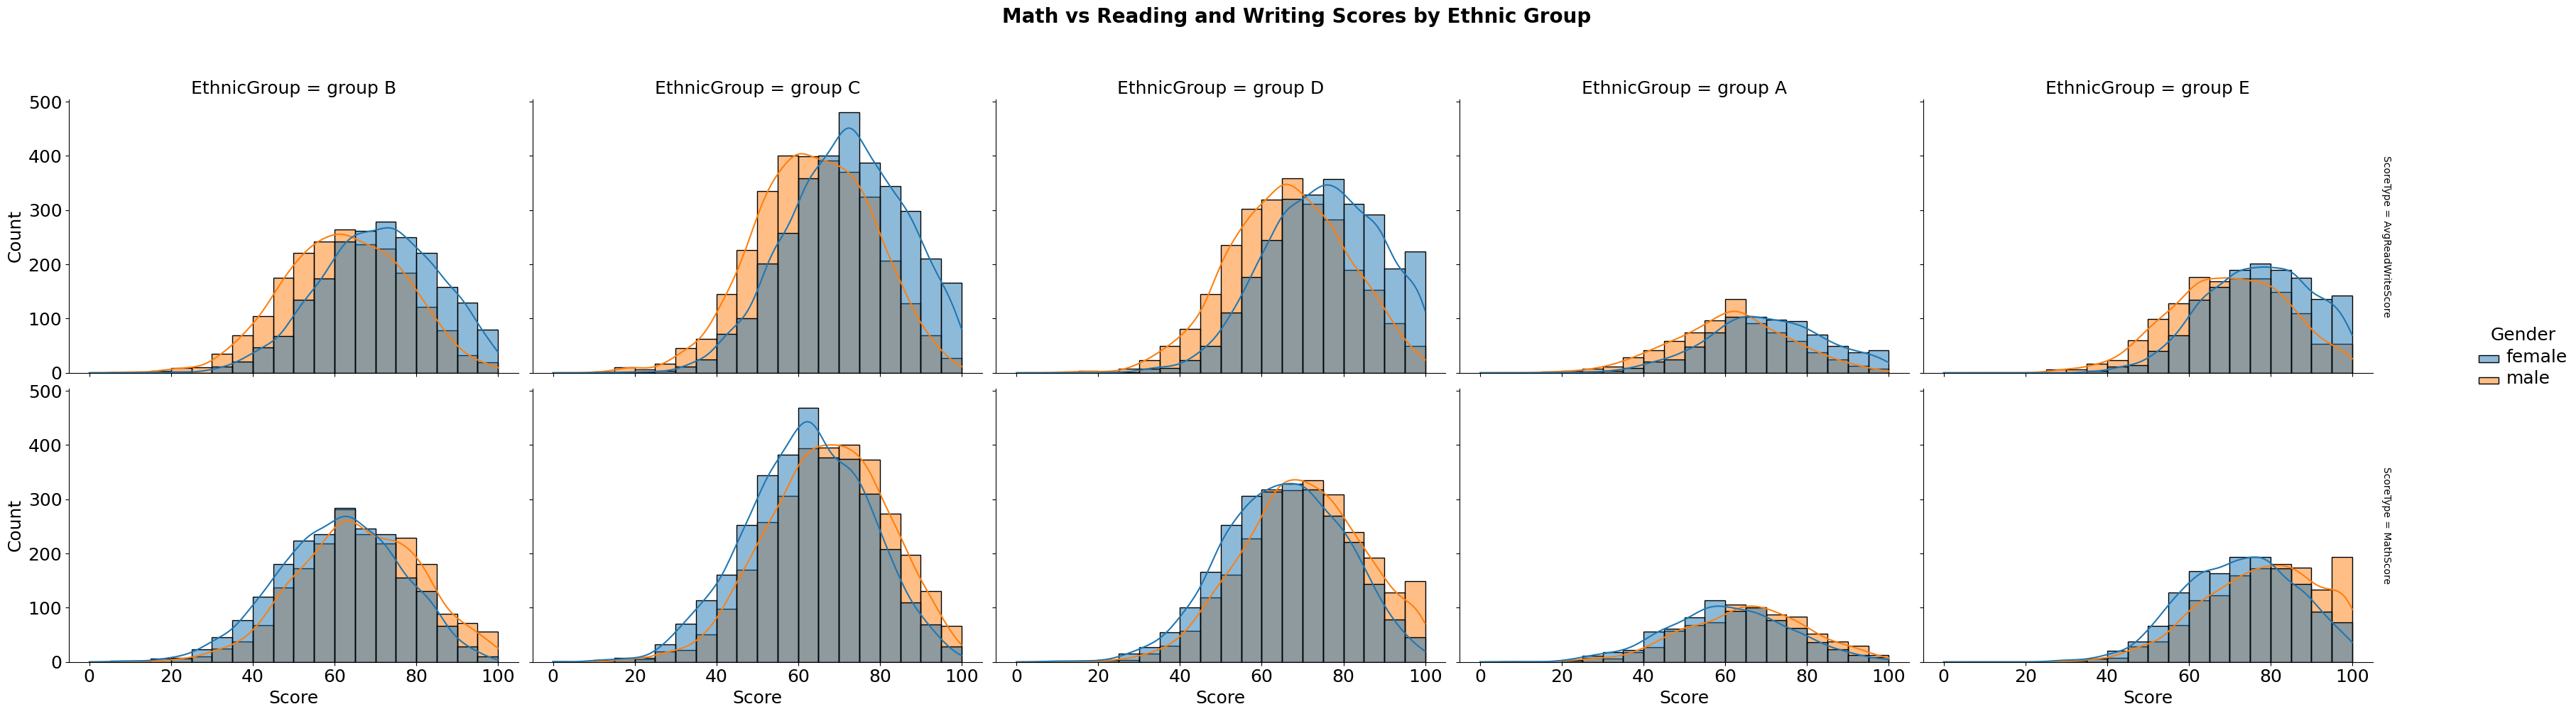

In [3]:
## Task 3: Data Visualization
print("\n=== 🔍📈 Data Visualization ===")

### 1. Line chart of average scores by weekly study hours
#### Create map for Weekly Study Hours
wkly_study_map = {
    '< 5': 1,
    '5 - 10': 2,
    '> 10': 3
}
df['WklyStudyHoursNumeric'] = df['WklyStudyHours'].map(wkly_study_map)  # Ensure WklyStudyHours is integer for grouping
avg_hrs_scores = df.groupby('WklyStudyHoursNumeric')[['AvgReadWriteScore', 'MathScore']].mean().reset_index()

#### Plot line chart
print(f"\n== 📈 Line Chart ==")
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_hrs_scores, x='WklyStudyHoursNumeric', y='AvgReadWriteScore', marker='o', label='Avg Read/Write Score')
sns.lineplot(data=avg_hrs_scores, x='WklyStudyHoursNumeric', y='MathScore', marker='o', label='Avg Math Score')
plt.title('Average Scores by Weekly Study Hours')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.legend(title='Score Type')
plt.grid()
plt.show()


### 2. Bar chart of average reading/writing scores and Math scores by gender
#### Create and melt avg_read_write dataframe for bar chart
avg_readwrite_math = df.groupby('Gender')[['AvgReadWriteScore', 'MathScore']].mean().reset_index()
long_df = avg_readwrite_math.melt(
    id_vars= "Gender",
    value_vars=["AvgReadWriteScore", "MathScore"],
    var_name="Score Type",
    value_name="Score"
)

#### Plot bar chart
print(f"\n== 📊 Bar Chart ==")
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Gender', y='Score', hue='Score Type')
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.legend(title='Score Type')
plt.grid()
plt.show()


### 3. Histogram showing distribution of Math scores and Average Reading and Writing scores
### by gender inside each ethnic group
#### Melt df to have usable data for histogram
df_long = df.melt(
    id_vars= ["Gender", "EthnicGroup"],
    value_vars= ["AvgReadWriteScore", "MathScore"],
    var_name= "ScoreType",
    value_name= "Score"
)

#### Plot the histogram
print(f"\n== 📊 Histogram ==")
g = sns.displot(
    data=df_long,
    x="Score",
    hue= "Gender",
    row= "ScoreType",
    col="EthnicGroup",
    multiple="layer",
    bins=20,
    kde=True,
    facet_kws={"margin_titles": True},
    height=5,
    aspect=1.4,
)

##### Main title for the histogram
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Math vs Reading and Writing Scores by Ethnic Group", fontsize=20, weight="bold" )

#### Increase size of Text in the Histogram
# Axes: x/y labels, ticks & col lables
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.tick_params(labelsize=18)
    if ax.get_title():  # col facet labels
        ax.set_title(ax.get_title(), fontsize=18)

# Row facet labels
row_labels= df_long["ScoreType"].unique()
for text in g.fig.texts:
    if text.get_text() in row_labels:
        text.set_fontsize(18)

# Legend
g._legend.get_title().set_fontsize(18)
for text in g._legend.get_texts():
    text.set_fontsize(18)



== 🔘 Scatter Plot ==


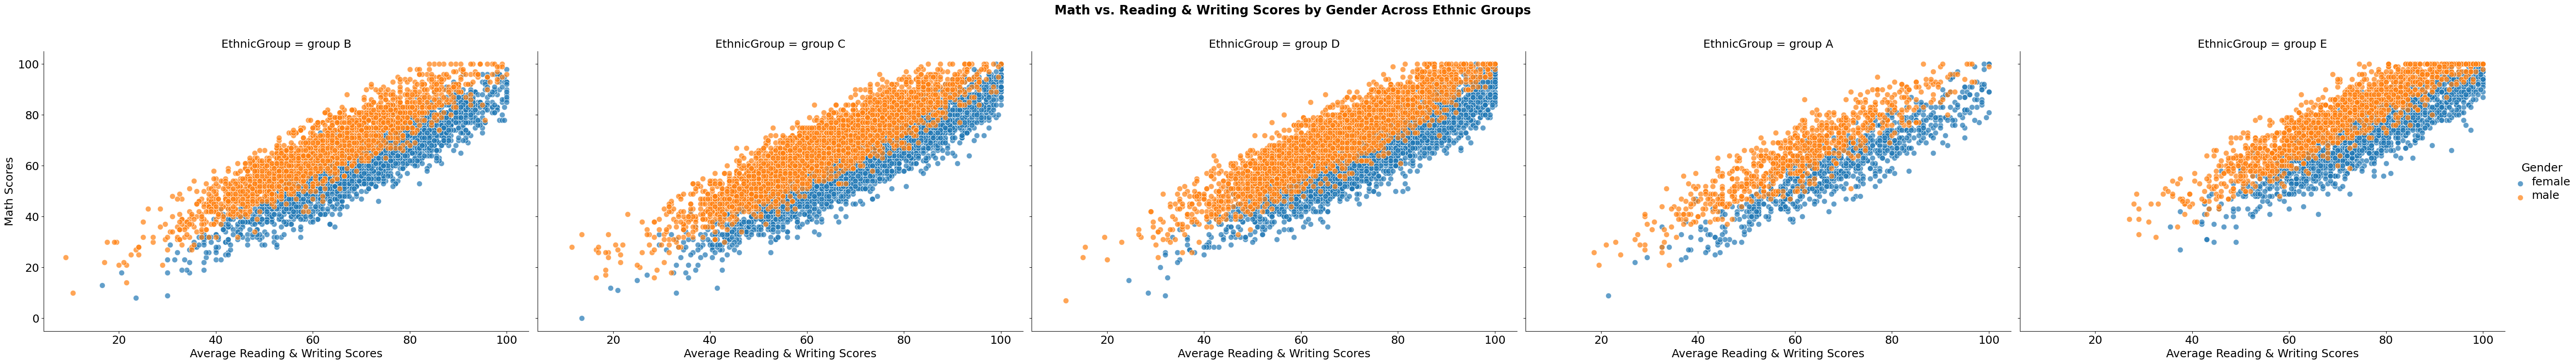

In [4]:
## Task 3 (cont)
### Scatter Plot showing the distribution of Math Scores to Average Reading and Writing Scores
### by Gender across Ethnic Groups
#### Plot the Scatter Plot
print(f"\n== 🔘 Scatter Plot ==")
s = sns.FacetGrid(
    data=df,
    col="EthnicGroup",
    hue="Gender",
    height=8,
    aspect=1.4
)

s.map_dataframe(sns.scatterplot, "AvgReadWriteScore", "MathScore", alpha=0.7, s=80)
s.add_legend()
s.set_axis_labels("Average Reading & Writing Scores", "Math Scores")
s.fig.suptitle("Math vs. Reading & Writing Scores by Gender Across Ethnic Groups", fontsize=20, weight="bold")
s.fig.subplots_adjust(top=0.85)

#### Increase size of Text in the Scatter Plot
# Axes: x/y labels, ticks, col titles
for ax in s.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.tick_params(labelsize=18)
    if ax.get_title():  # col facet labels
        ax.set_title(ax.get_title(), fontsize=18)

# Legend
s._legend.get_title().set_fontsize(18)
for text in s._legend.get_texts():
    text.set_fontsize(18)

In [5]:
### Save the chart data to a brand-new Excel file (fast overwrite)
output_file = "Visualization_Data.xlsx"

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    avg_hrs_scores.to_excel(writer, sheet_name='LineChart_Data', index=False)
    avg_readwrite_math.to_excel(writer, sheet_name='BarChart_Data', index=False)
    df_long.to_excel(writer, sheet_name='Histogram_Data', index=False)
    df[['AvgReadWriteScore', 'MathScore', 'Gender', 'EthnicGroup']].to_excel(
        writer, sheet_name='ScatterPlot_Data', index=False
    )

print(f"✅ Visualization data saved to **{output_file}** with sheets:")
print("   - LineChart_Data")
print("   - BarChart_Data")
print("   - Histogram_Data")
print("   - ScatterPlot_Data")


✅ Visualization data saved to **Visualization_Data.xlsx** with sheets:
   - LineChart_Data
   - BarChart_Data
   - Histogram_Data
   - ScatterPlot_Data



=== 📘 Math Score Category Prediction Report ===
              precision    recall  f1-score   support

        High       0.82      0.71      0.76      1175
         Low       0.84      0.83      0.83      2095
      Medium       0.77      0.82      0.79      2810

    accuracy                           0.80      6080
   macro avg       0.81      0.78      0.79      6080
weighted avg       0.80      0.80      0.80      6080



c:\Program Files\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


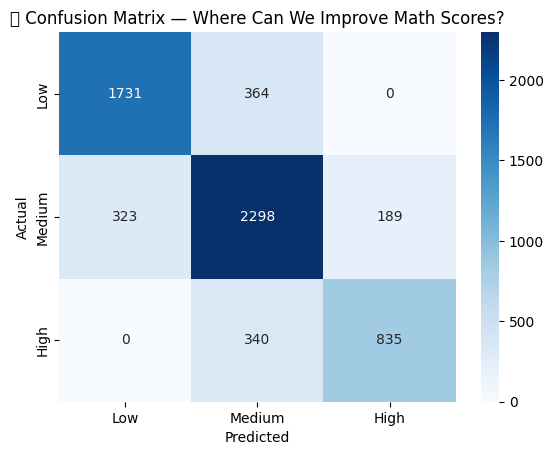

In [6]:
## 🎯 Bonus: Math Score Category Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📦 Step 1: Convert continuous MathScore into categories (so we can classify)
def categorize_math(score):
    if score <= 60:
        return 'Low'
    elif score <= 80:
        return 'Medium'
    else:
        return 'High'

df['MathCategory'] = df['MathScore'].apply(categorize_math)

# 🔄 Step 2: One-hot encode Gender and EthnicGroup
categorical_cols = [
    'Gender',
    'EthnicGroup',
    'ParentEduc',
    'LunchType',
    'TestPrep',
    'ParentMaritalStatus',
    'PracticeSport',
    'IsFirstChild',
    'TransportMeans'
]

# Fill missing string values to avoid NaNs during encoding
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🎯 Step 3: Define Features and Target
base_features = ['AvgReadWriteScore', 'WklyStudyHoursNumeric', 'NrSiblings']
dummy_features = [col for col in df_encoded.columns
                  if any(col.startswith(cat + '_') for cat in categorical_cols)]
features = base_features + dummy_features

X = df_encoded[features]
y = df_encoded['MathCategory'] # Classification target

# 🤲 Step 4: Split the data (learning vs serving)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 🌱 Step 5: Grow a Forest of Wisdom (Random Forest Classifier)
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight="balanced",
    random_state=42
    )
model.fit(X_train, y_train)

# 🎯 Step 6: Predict Math Category
y_pred = model.predict(X_test)

# 📋 Step 7: Ubuntu Report — How did we do?
print("\n=== 📘 Math Score Category Prediction Report ===")
print(classification_report(y_test, y_pred))

# 🖼️ Step 8: Confusion Matrix — Where can we teach better?
labels = ['Low', 'Medium', 'High']
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title("📊 Confusion Matrix — Where Can We Improve Math Scores?")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [7]:
## 🎯 Bonus: Math Score Category Prediction Model (cont)
import os
from datetime import datetime
from openpyxl import load_workbook

# 💽 Save data to new sheet in our Excel file
# Row of metrics for this run
accuracy = (y_pred == y_test).mean()
new_row = pd.DataFrame([{
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "n_estimators": model.n_estimators,
    "accuracy": accuracy,
    "low_low": cm[0,0], "low_med": cm[0,1], "low_high": cm[0,2],
    "med_low": cm[1,0], "med_med": cm[1,1], "med_high": cm[1,2],
    "high_low": cm[2,0], "high_med": cm[2,1], "high_high": cm[2,2]
}])

log_filename = "Prediction_Model_history.xlsx"
sheet_name ="ModelRuns"
# Append to the same sheet if it exists; otherwise create it
try:
    if os.path.exists(log_filename):
        try:
            existing = pd.read_excel(log_filename, sheet_name=sheet_name)
            combined = pd.concat([existing, new_row], ignore_index=True)
        except (FileNotFoundError, ValueError):
            print("⚠️  Sheet 'ModelRuns' not found. A new sheet will be created.")
            combined = new_row

        # Overwrite that single sheet with updated history
        with pd.ExcelWriter(log_filename, mode="a", 
                            engine="openpyxl", 
                            if_sheet_exists="replace") as writer:
            combined.to_excel(writer, sheet_name=sheet_name, index=False)
            print(f"✅ Logged run to {excel_filename} (sheet: ModelRuns).")
    else:
        new_row.to_excel(log_filename, sheet_name="ModelRuns", index=False)
        print(f"🆕 Created {log_filename} and saved first run to sheet 'ModelRuns'.")

except PermissionError:
    print("❌ Cannot write: the Excel file is open. Close it and rerun.")
except Exception as e:
    print(f"❌ Unexpected error while saving: {e}")

🆕 Created Prediction_Model_history.xlsx and saved first run to sheet 'ModelRuns'.


In [8]:
print("\n🎉 WELL DONE! You’ve completed a full data analysis workflow with clarity and purpose.")
print("You didn’t just analyze scores — you made sense of patterns, honored context, and brought structure to raw information.")

print("\n📌 What You’ve Accomplished:")
print("✔️ Cleaned and prepared the dataset for analysis.")
print("✔️ Ran basic statistics to understand overall trends.")
print("✔️ Grouped math, reading, and writing scores by gender for deeper insight.")
print("✔️ Calculated average reading & writing scores, and math scores for all students.")
print("✔️ Explored the correlation between reading & writing averages and math performance.")
print("✔️ Created a summary of key metrics — including correlation strength and interpretation.")
print("✔️ ➕ Built a machine-learning model to predict Math score categories (Low/Medium/High).")
print("✔️ ➕ Tuned a Random Forest classifier and evaluated it with a detailed confusion matrix.")
print("✔️ ➕ Improved High-score recall by rebalancing classes and adjusting model parameters.")

print("\n📊 Visualized the Data:")
print("📈 Line Chart → Avg scores by weekly study hours")
print("📊 Bar Chart → Avg reading/writing & math scores by gender")
print("📉 Histogram → Score distribution by gender within each ethnic group")
print("🔘 Scatter Plot → Math vs. Avg reading/writing scores by gender across ethnic groups")
print("🟦 Confusion Matrix → Model performance on Math score categories")

print("\n💾 All supporting datasets saved to Excel:")
print("→ 'LineChart_Data', 'BarChart_Data', 'Histogram_Data', and 'ScatterPlot_Data' sheets created.")
print("→ Added 'Model_Evaluation' results with classification report and confusion matrix.")

print("\n💡 Where to Go Next:")
print("→ Try applying the same pipeline to a real-world dataset (like health or education data).")
print("→ Consider fairness: Who's missing in the data? Whose story isn’t told?")
print("→ Experiment with other algorithms (Gradient Boosting, XGBoost) or feature engineering to improve accuracy.")
print("→ Share your notebook — collaboration turns insights into impact.")

print("\n🌍 Remember: Behind every dataset are real people, and every analysis is a step toward understanding them better.")



🎉 WELL DONE! You’ve completed a full data analysis workflow with clarity and purpose.
You didn’t just analyze scores — you made sense of patterns, honored context, and brought structure to raw information.

📌 What You’ve Accomplished:
✔️ Cleaned and prepared the dataset for analysis.
✔️ Ran basic statistics to understand overall trends.
✔️ Grouped math, reading, and writing scores by gender for deeper insight.
✔️ Calculated average reading & writing scores, and math scores for all students.
✔️ Explored the correlation between reading & writing averages and math performance.
✔️ Created a summary of key metrics — including correlation strength and interpretation.
✔️ ➕ Built a machine-learning model to predict Math score categories (Low/Medium/High).
✔️ ➕ Tuned a Random Forest classifier and evaluated it with a detailed confusion matrix.
✔️ ➕ Improved High-score recall by rebalancing classes and adjusting model parameters.

📊 Visualized the Data:
📈 Line Chart → Avg scores by weekly study